In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

8. Age -- quantitative -- Day (1~365) -- Input Variable

9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [3]:
data = pd.read_csv("/content/sample_data/Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


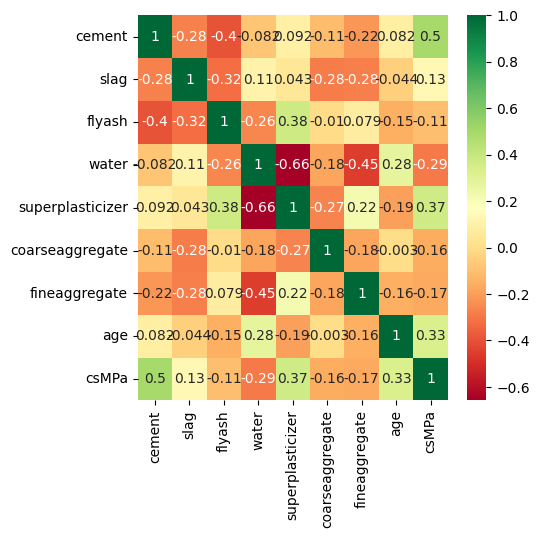

In [4]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# OBSERVATIONS:
    
We observe a good positive correlation between csMPa and :
    1. Cement
    2. Age
    3. Superplasticizer
    
We also observe a good negetive correlation between csMPa and:
    1. Water

Superplasticizer and water have a very strong negetive correlation

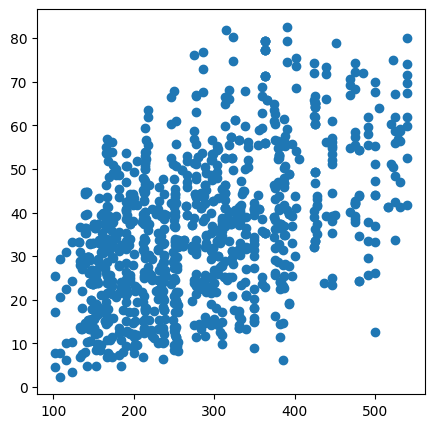

In [5]:
plt.figure(figsize = (5,5))
plt.scatter(x = 'cement',
           y = 'csMPa',
           data = data)
plt.show()

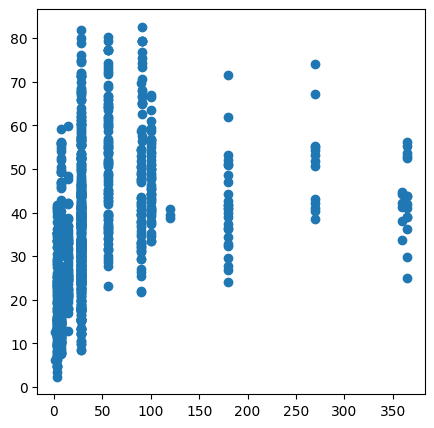

In [6]:
plt.figure(figsize = (5,5))
plt.scatter(x = 'age',
           y = 'csMPa',
           data = data)
plt.show()

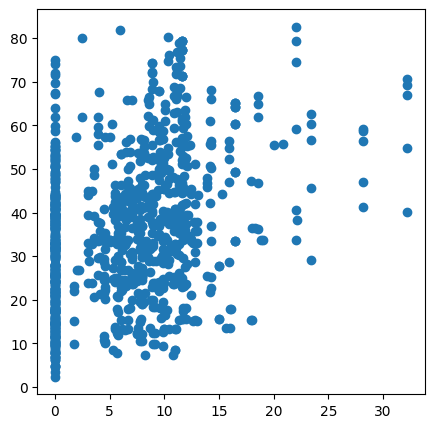

In [7]:
plt.figure(figsize = (5,5))
plt.scatter(x = 'superplasticizer',
           y = 'csMPa',
           data = data)
plt.show()

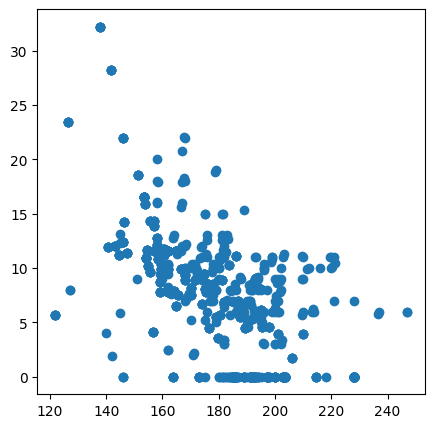

In [8]:
plt.figure(figsize = (5,5))
plt.scatter(x = 'water',
           y = 'superplasticizer',
           data = data)
plt.show()

The observations made have been shown above in the graphs above

In [9]:
fields = list(data.keys())
values = []
scaled_values = []
for field in fields:
    values = data[field]
    maximum = max(values)
    avg = sum(values)/len(values)
    for value in values:
        scaled_values += [(value-avg)/maximum]
    scaled_values = np.array(scaled_values)
    data["Scaled_" + field] = scaled_values

data.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


In [10]:
for field in fields:
    data.drop([field], axis = 1, inplace = True)

data.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


In [11]:
y = data["Scaled_csMPa"]
data.drop(["Scaled_csMPa"], axis = 1, inplace = True)
X = data

In [12]:
y.head()

0    0.479319
1    0.479319
2    0.095060
3    0.095060
4   -0.152903
Name: Scaled_csMPa, dtype: float64

In [13]:
X.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age
0,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


# Train Test Splitting

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

In [15]:
print(X_train.shape)
print(y_train.shape)

(721, 8)
(721,)


# Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_predict = model.predict(X_test)

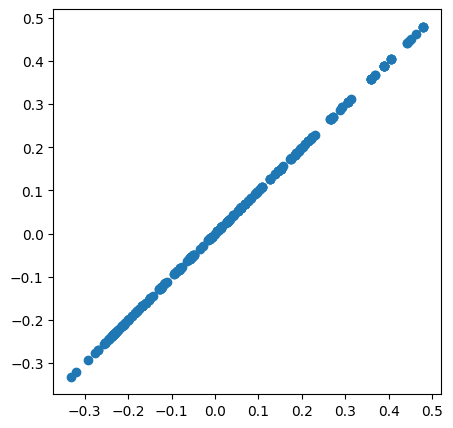

In [18]:
plt.figure(figsize = (5,5))
Y_test = [i for i in y_test]
Y_predict = [j for j in y_predict]
plt.scatter(Y_test,Y_predict)
plt.show()

# TEST DATA

In [19]:
data_test = pd.read_csv("/content/sample_data/concrete.csv")

In [20]:
data_test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [21]:
fields = list(data_test.keys())
values = []
scaled_values = []
for field in fields:
    values = data_test[field]
    maximum = max(values)
    avg = sum(values)/len(values)
    for value in values:
        scaled_values += [(value-avg)/maximum]
    scaled_values = np.array(scaled_values)
    data_test["Scaled_" + field] = scaled_values

data_test.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015


In [22]:
for field in fields:
    data_test.drop([field], axis = 1, inplace = True)

data_test.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015
1,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903
2,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718
3,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089
4,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015


In [23]:
print(data_test.columns)


Index(['Scaled_cement', 'Scaled_slag', 'Scaled_flyash', 'Scaled_water',
       'Scaled_superplasticizer', 'Scaled_coarseaggregate',
       'Scaled_fineaggregate', 'Scaled_age', 'Scaled_csMPa'],
      dtype='object')


In [24]:
# Choose the appropriate target variable
Y = data_test['Scaled_csMPa']

# Drop the target variable from the DataFrame
data_test.drop(['Scaled_csMPa'], axis=1, inplace=True)


In [25]:
print(data_test.columns)


Index(['Scaled_cement', 'Scaled_slag', 'Scaled_flyash', 'Scaled_water',
       'Scaled_superplasticizer', 'Scaled_coarseaggregate',
       'Scaled_fineaggregate', 'Scaled_age'],
      dtype='object')


In [26]:
# Assuming you have a DataFrame named data_test
X = data_test[['Scaled_cement', 'Scaled_slag', 'Scaled_flyash', 'Scaled_water',
               'Scaled_superplasticizer', 'Scaled_coarseaggregate',
               'Scaled_fineaggregate', 'Scaled_age']]

# Assuming your model is named 'model'
y_predict = model.predict(X)


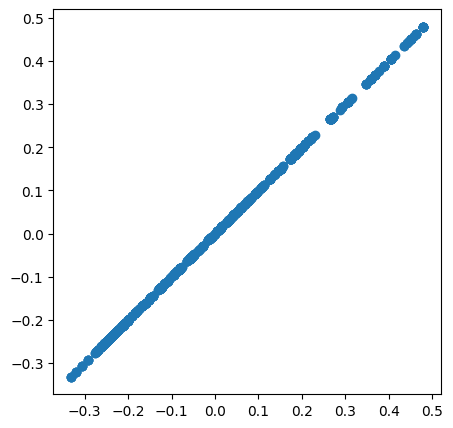

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(Y, y_predict)
plt.show()

# Saving model in disk

In [28]:
import pickle
filename = "Concrete_strength_Lr_Model"
pickle.dump(model, open(filename,"wb"))

# **Modification**

# 1 **Import Again Train & Test Data**

In [29]:
train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv'
test_data_path = '/content/sample_data/concrete.csv'

In [30]:
data.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age
0,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


# **2. visualizes the feature importances**

Feature ranking:
1. age: 0.335657693087053
2. cement: 0.33095519901200243
3. water: 0.10746508730799688
4. slag: 0.07886787161340057
5. superplasticizer: 0.0647205765644808
6. fineaggregate: 0.03831137482666788
7. coarseaggregate: 0.027685664901252557
8. flyash: 0.016336532687145952


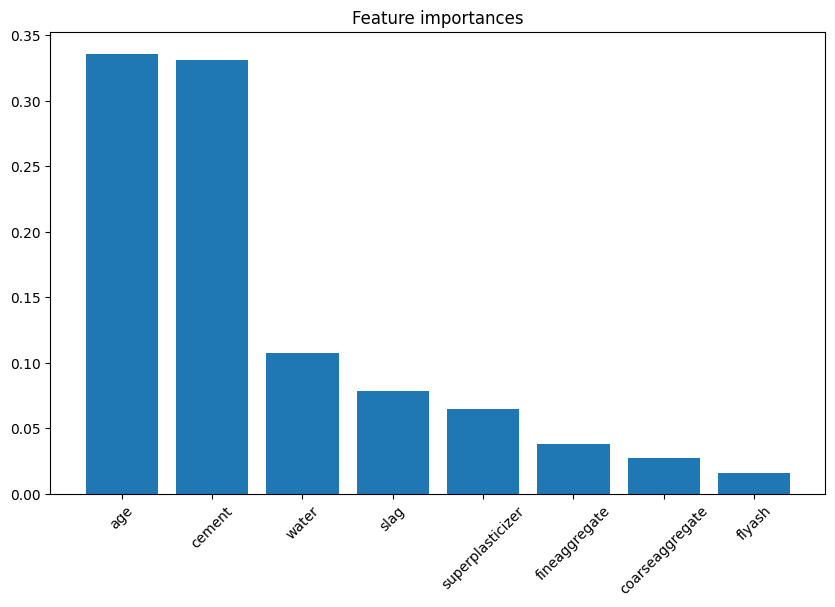

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the training data
train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv'
train_data = pd.read_csv(train_data_path)

# Assuming the target variable is the last column
X_train = train_data.iloc[:, :-1]  # Exclude the last column
y_train = train_data.iloc[:, -1]   # Take only the last column

# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]}: {importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.show()


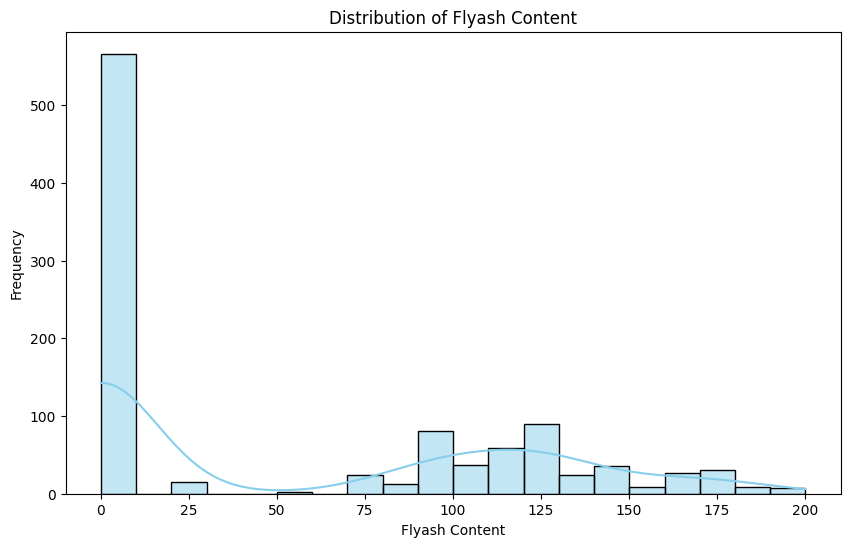

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data into a DataFrame
train_data = pd.read_csv('/content/sample_data/Concrete_Data_Yeh.csv')

# Visualize the 'flyash' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_data['flyash'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Flyash Content')
plt.xlabel('Flyash Content')
plt.ylabel('Frequency')
plt.show()


#3. Data Scaling Script

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load training data into a DataFrame
train_data = pd.read_csv('/content/sample_data/Concrete_Data_Yeh.csv')

# Separate numerical columns (excluding one-hot encoded columns) for scaling
numerical_columns = ['cement', 'slag', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']
X_numerical = train_data[numerical_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Create a DataFrame with the scaled numerical features
X_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_columns)

# Concatenate the scaled numerical features with the one-hot encoded columns
train_data_scaled = pd.concat([X_scaled_df, train_data.drop(columns=numerical_columns)], axis=1)

# Display the scaled DataFrame
print(train_data_scaled.head())


     cement      slag     water  superplasticizer  coarseaggregate  \
0  2.477915 -0.856888 -0.916764         -0.620448         0.863154   
1  2.477915 -0.856888 -0.916764         -0.620448         1.056164   
2  0.491425  0.795526  2.175461         -1.039143        -0.526517   
3  0.491425  0.795526  2.175461         -1.039143        -0.526517   
4 -0.790459  0.678408  0.488793         -1.039143         0.070527   

   fineaggregate       age     csMPa  flyash  
0      -1.217670 -0.279733  2.645408     0.0  
1      -1.217670 -0.279733  1.561421     0.0  
2      -2.240917  3.553066  0.266627     0.0  
3      -2.240917  5.057677  0.313340     0.0  
4       0.647884  4.978487  0.507979     0.0  


# 3. **Correlation Matrix**

In [34]:
# prompt: train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv', i want head()

data = pd.read_csv(train_data_path)
data.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


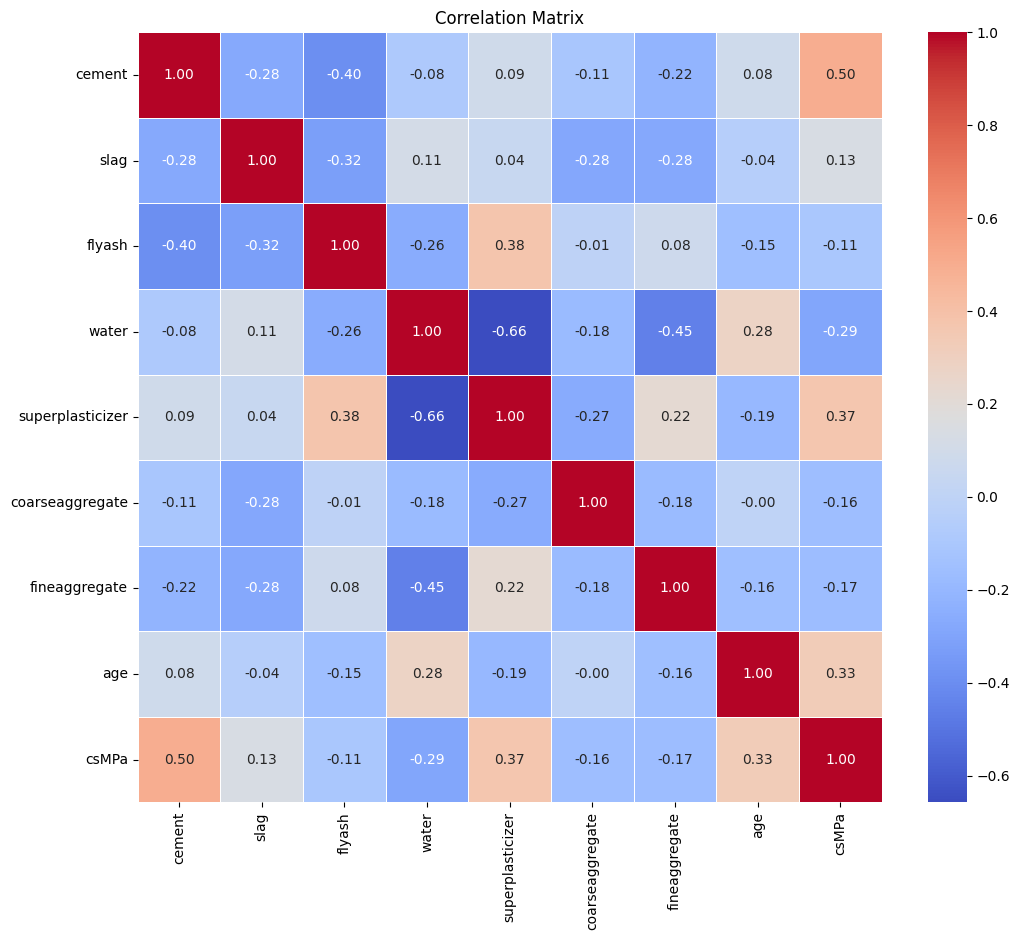

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your feature matrix and y_train is your target variable
# Convert them to DataFrames
X_train_df = pd.DataFrame(X_train, columns=['cement', 'slag', 'flyash', 'water',
                                            'superplasticizer', 'coarseaggregate',
                                            'fineaggregate', 'age'])
y_train_df = pd.DataFrame(y_train, columns=['csMPa'])

# Combine them into one DataFrame for simplicity
train_data = pd.concat([X_train_df, y_train_df], axis=1)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)

# Convert the scaled features to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_df.columns)

# Combine scaled features and target variable into one DataFrame
train_data_scaled = pd.concat([X_train_scaled_df, y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = train_data_scaled.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [36]:
import plotly.express as px

# Assuming 'data' is your DataFrame with columns: 'cement', 'slag', 'flyash', 'water',
# 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale="Viridis")

fig.update_layout(title="Correlation Matrix",
                  width=800,
                  height=800)

fig.show()


# 4. Feature Distribution Visualization Script

<ipython-input-37-af5312616982>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-af5312616982>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-af5312616982>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-af5312616982>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-af5312616982>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-af5312616982

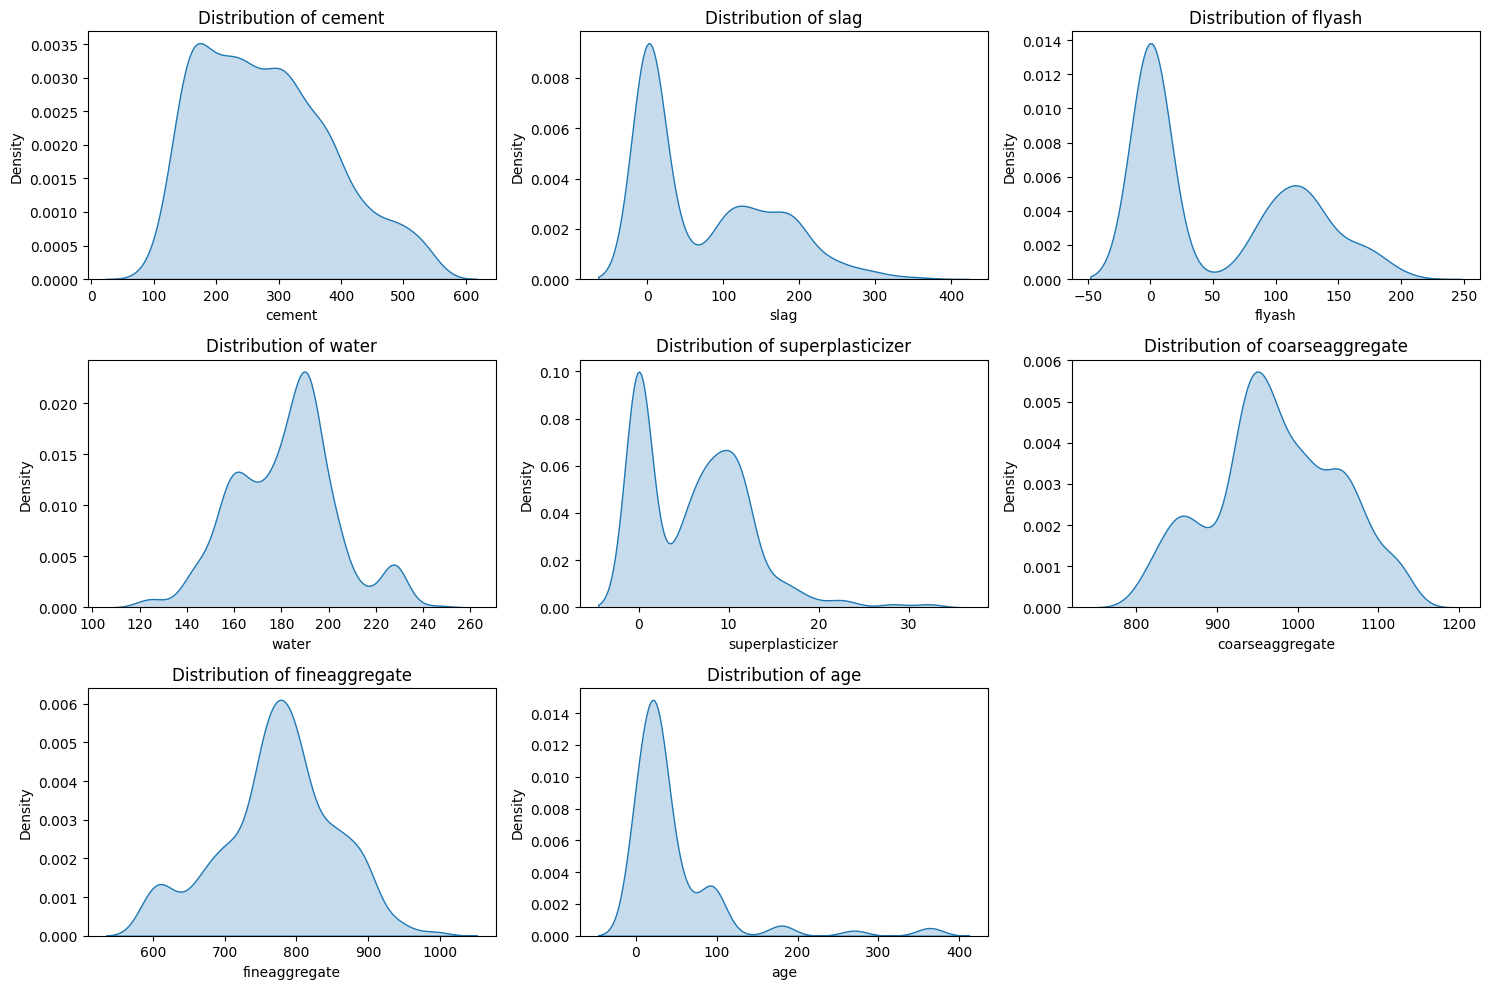

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns: 'cement', 'slag', 'flyash', 'water',
# 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa'

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each feature and plot its distribution
for i, column in enumerate(data.columns[:-1]):  # Exclude the target variable 'csMPa'
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


# 5. Data Handling

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data

# 1. Handling Missing Values
data = data.dropna()  # Drop rows with missing values, you may use imputation if needed

# 2. Handling Outliers
# Identify and handle outliers, e.g., using Z-score or IQR methods

# 3. Data Scaling
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 4. Feature Engineering (if needed)
# For example, creating new features or transforming existing ones

# 5. Encoding Categorical Variables (if needed)
# For example, one-hot encoding for categorical variables

# Split the data into features (X) and target variable (y)
X = data.drop('csMPa', axis=1)
y = data['csMPa']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/sample_data/Concrete_Data_Yeh.csv')

# Print the shape of the original data
print("Original Data Shape:", data.shape)

# 1. Handling Missing Values
data = data.dropna()  # Drop rows with missing values, you may use imputation if needed

# Print the shape after handling missing values
print("Data Shape after Handling Missing Values:", data.shape)

# ... (add print statements for other steps)

# Split the data into features (X) and target variable (y)
X = data.drop('csMPa', axis=1)
y = data['csMPa']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Original Data Shape: (1030, 9)
Data Shape after Handling Missing Values: (1030, 9)


#6. Data Preprocessing
**6.1 Handling Null Values**

In [39]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Sample data with null values
data = pd.DataFrame({
    'cement': [540, 500, None, 380, 420],
    'slag': [0, None, 145, 125, 135],
    'flyash': [78, 120, None, None, 200],
    'water': [162, 210, 143, 185, 185],
    'superplasticizer': [2.5, 3.0, None, 2.8, 3.2],
    'coarseaggregate': [1040, 987, 1024, 888, 945],
    'fineaggregate': [676, 732, 696, None, 759],
    'age': [28, 14, 28, 28, 28],
    'csMPa': [79.99, 61.89, 40.27, 41.05, 44.3]
})

# Method 1: Dropping Null Values
data_without_null = data.dropna()

# Method 2: Imputation (Filling with Mean)
data_imputed = data.fillna(data.mean())

# Method 3: Forward Fill
data_forward_fill = data.ffill()

# Method 4: Backward Fill
data_backward_fill = data.bfill()

# Method 5: Linear Interpolation
data_interpolated = data.interpolate()

# Method 6: Creating Binary Indicator Column
data['cement_missing'] = data['cement'].isnull().astype(int)

# Display the results
print("Original Data:")
print(data)
print("\nData after Dropping Null Values:")
print(data_without_null)
print("\nData after Imputation (Filling with Mean):")
print(data_imputed)
print("\nData after Forward Fill:")
print(data_forward_fill)
print("\nData after Backward Fill:")
print(data_backward_fill)
print("\nData after Linear Interpolation:")
print(data_interpolated)
print("\nData with Binary Indicator Column for 'cement' Missing Values:")
print(data)


Original Data:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0    78.0    162               2.5             1040   
1   500.0    NaN   120.0    210               3.0              987   
2     NaN  145.0     NaN    143               NaN             1024   
3   380.0  125.0     NaN    185               2.8              888   
4   420.0  135.0   200.0    185               3.2              945   

   fineaggregate  age  csMPa  cement_missing  
0          676.0   28  79.99               0  
1          732.0   14  61.89               0  
2          696.0   28  40.27               1  
3            NaN   28  41.05               0  
4          759.0   28  44.30               0  

Data after Dropping Null Values:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0    78.0    162               2.5             1040   
4   420.0  135.0   200.0    185               3.2              945   

   fineaggregate  age  csMPa  
0     

**6.2 Min-Max Scaling and Standardization**

In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'data' is your DataFrame
# Choose the columns to be scaled (excluding the target variable, e.g., 'csMPa')
columns_to_scale = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

# Method 1: Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_scaled_minmax = data.copy()
data_scaled_minmax[columns_to_scale] = scaler_minmax.fit_transform(data[columns_to_scale])

# Method 2: Standardization (Z-score normalization)
scaler_standard = StandardScaler()
data_scaled_standard = data.copy()
data_scaled_standard[columns_to_scale] = scaler_standard.fit_transform(data[columns_to_scale])

# Display the results
print("Original Data:")
print(data)
print("\nData after Min-Max Scaling:")
print(data_scaled_minmax)
print("\nData after Standardization:")
print(data_scaled_standard)


Original Data:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0    78.0    162               2.5             1040   
1   500.0    NaN   120.0    210               3.0              987   
2     NaN  145.0     NaN    143               NaN             1024   
3   380.0  125.0     NaN    185               2.8              888   
4   420.0  135.0   200.0    185               3.2              945   

   fineaggregate  age  csMPa  cement_missing  
0          676.0   28  79.99               0  
1          732.0   14  61.89               0  
2          696.0   28  40.27               1  
3            NaN   28  41.05               0  
4          759.0   28  44.30               0  

Data after Min-Max Scaling:
   cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0    1.00  0.000000  0.000000  0.283582          0.000000         1.000000   
1    0.75       NaN  0.344262  1.000000          0.714286         0.651316   
2     NaN  1.000000

**6.3 Robust Scaler**

In [41]:
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your DataFrame
# Choose the columns to be scaled (excluding the target variable, e.g., 'csMPa')
columns_to_scale = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

# Initialize the RobustScaler
scaler_robust = RobustScaler()

# Fit and transform the selected columns
data_scaled_robust = data.copy()
data_scaled_robust[columns_to_scale] = scaler_robust.fit_transform(data[columns_to_scale])

# Display the results
print("Original Data:")
print(data)
print("\nData after Robust Scaling:")
print(data_scaled_robust)


Original Data:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0    78.0    162               2.5             1040   
1   500.0    NaN   120.0    210               3.0              987   
2     NaN  145.0     NaN    143               NaN             1024   
3   380.0  125.0     NaN    185               2.8              888   
4   420.0  135.0   200.0    185               3.2              945   

   fineaggregate  age  csMPa  cement_missing  
0          676.0   28  79.99               0  
1          732.0   14  61.89               0  
2          696.0   28  40.27               1  
3            NaN   28  41.05               0  
4          759.0   28  44.30               0  

Data after Robust Scaling:
   cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0     0.8 -2.971429 -0.688525 -1.000000         -1.230769         0.670886   
1     0.4       NaN  0.000000  1.086957          0.307692         0.000000   
2     NaN  0.342857 

**6.4 cross-Validation**

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Assuming 'data' is your DataFrame
# Separate features (X) and target variable (y)
X = data.drop('csMPa', axis=1)  # Assuming 'csMPa' is the target variable
y = data['csMPa']

# Create a pipeline with imputation and model
model = RandomForestRegressor()
pipeline = make_pipeline(SimpleImputer(strategy='mean'), model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation (you can adjust the number of folds)

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Cross-Validation Scores: [nan nan nan nan nan]
Mean CV Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



**6.5 k-fold cross-validation**

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Assuming 'data' is your DataFrame
# Separate features (X) and target variable (y)
X = data.drop('csMPa', axis=1)  # Assuming 'csMPa' is the target variable
y = data['csMPa']

# Initialize your machine learning model (replace with your specific model)
model = RandomForestRegressor()  # Example: Random Forest Regressor

# Specify the number of folds (K)
num_folds = 5  # You can adjust this value based on your preference

# Initialize K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a pipeline with imputation and model
pipeline = make_pipeline(SimpleImputer(strategy='mean'), model)

# Perform K-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf)

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Cross-Validation Scores: [nan nan nan nan nan]
Mean CV Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



## 7. Data plotting


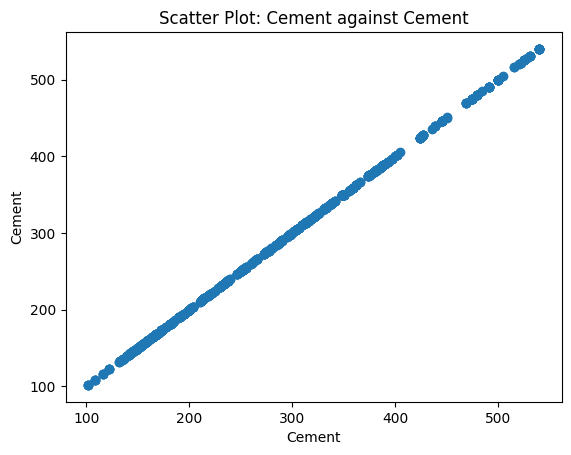

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training data into a DataFrame
train_data = pd.read_csv('/content/sample_data/Concrete_Data_Yeh.csv')

# Scatter plot for 'cement' against 'cement'
plt.scatter(train_data['cement'], train_data['cement'])
plt.xlabel('Cement')
plt.ylabel('Cement')
plt.title('Scatter Plot: Cement against Cement')
plt.show()


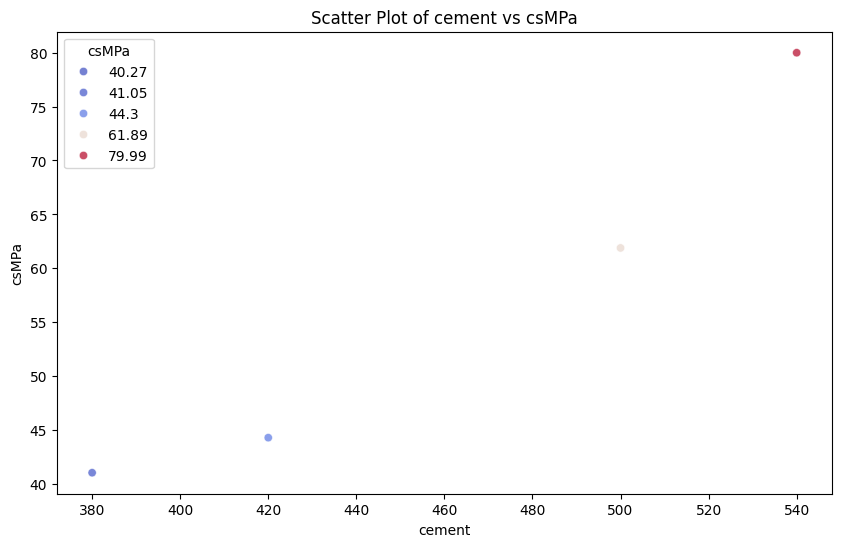

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'csMPa' is your target variable and 'cement' is a feature
target_variable = 'csMPa'
feature_variable = 'cement'

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[feature_variable], y=data[target_variable], hue=data[target_variable], palette='coolwarm', alpha=0.7)
plt.title(f'Scatter Plot of {feature_variable} vs {target_variable}')
plt.xlabel(feature_variable)
plt.ylabel(target_variable)
plt.show()


In [46]:
'''import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load training data
train_data = pd.read_csv(train_data_path)

# Load testing data
test_data = pd.read_csv(test_data_path)

# Assuming 'csMPa' is your continuous target variable in both datasets
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Create a binary target variable based on the threshold for both training and testing datasets
train_data['target_class'] = np.where(train_data[target_variable] > threshold, 1, 0)
test_data['target_class'] = np.where(test_data[target_variable] > threshold, 1, 0)

# Drop null values if needed
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Split the training data into features (X_train) and the new binary target variable (y_train)
X_train = train_data.drop([target_variable, 'target_class'], axis=1)
y_train = train_data['target_class']

# Split the testing data into features (X_test) and the new binary target variable (y_test)
X_test = test_data.drop([target_variable, 'target_class'], axis=1)
y_test = test_data['target_class']

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)'''


"import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\n# Load training data\ntrain_data = pd.read_csv(train_data_path)\n\n# Load testing data\ntest_data = pd.read_csv(test_data_path)\n\n# Assuming 'csMPa' is your continuous target variable in both datasets\ntarget_variable = 'csMPa'\n\n# Define a threshold to classify as class 0 or 1\nthreshold = 30  # Adjust this threshold based on your data distribution\n\n# Create a binary target variable based on the threshold for both training and testing datasets\ntrain_data['target_class'] = np.where(train_data[target_variable] > threshold, 1, 0)\ntest_data['target_class'] = np.where(test_data[target_variable] > threshold, 1, 0)\n\n# Drop null values if needed\ntrain_data = train_data.dropna()\ntest_data = test_data.dropna()\n\n# Remove leading and trailing whitespace

#8. Regression Evaluation Script with SVR

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix and 'y' is the target variable

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create an SVR regression model
model = make_pipeline(StandardScaler(), SVR())

# Perform cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# Display cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):", cv_scores)
print("Average RMSE:", np.mean(rmse_scores))


Cross-validation scores (Negative Mean Squared Error): [-1393.10553603  -367.09404176  -168.66261455  -139.22795125
   -51.54278631]
Average RMSE: 17.689972895464006


# 9. SVR Regression with Cross-Validation and Visualization Script

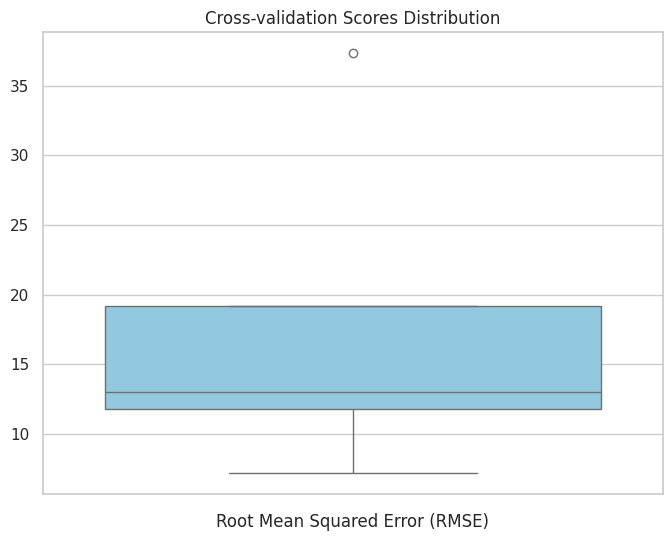

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix and 'y' is the target variable

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create an SVR regression model
model = make_pipeline(StandardScaler(), SVR())

# Perform cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# Visualize the cross-validation scores
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(rmse_scores, color='skyblue')
plt.title('Cross-validation Scores Distribution')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.show()


#10. Logistic Regression model

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Load training and testing data
train_data = pd.read_csv('/content/sample_data/Concrete_Data_Yeh.csv')
test_data = pd.read_csv('/content/sample_data/concrete.csv')

# Assuming 'csMPa' is your continuous target variable in both datasets
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Record the start time for both training and prediction
start_time_train = time.time()

# Create a binary target variable based on the threshold for both training and testing datasets
train_data['target_class'] = np.where(train_data[target_variable] > threshold, 1, 0)
test_data['target_class'] = np.where(test_data[target_variable] > threshold, 1, 0)

# Drop null values if needed
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Split the training data into features (X_train) and the new binary target variable (y_train)
X_train = train_data.drop([target_variable, 'target_class'], axis=1)
y_train = train_data['target_class']

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Record the end time for training
end_time_train = time.time()

# Record the start time for prediction
start_time_pred = time.time()

# Split the testing data into features (X_test) and the new binary target variable (y_test)
X_test = test_data.drop([target_variable, 'target_class'], axis=1)
y_test = test_data['target_class']

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Record the end time for prediction
end_time_pred = time.time()

# Calculate the elapsed time for training and prediction
elapsed_time_train = end_time_train - start_time_train
elapsed_time_pred = end_time_pred - start_time_pred

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics and elapsed time
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
print(f'\nElapsed Time for Training: {elapsed_time_train:.4f} seconds')
print(f'Elapsed Time for Prediction: {elapsed_time_pred:.4f} seconds')


Accuracy: 0.8728

Confusion Matrix:
[[333  65]
 [ 66 566]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       398
           1       0.90      0.90      0.90       632

    accuracy                           0.87      1030
   macro avg       0.87      0.87      0.87      1030
weighted avg       0.87      0.87      0.87      1030


Elapsed Time for Training: 0.0768 seconds
Elapsed Time for Prediction: 0.0045 seconds


#11.  Multilinear Regression

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load training data
train_data = pd.read_csv(train_data_path)

# Load testing data
test_data = pd.read_csv(test_data_path)

# Assuming 'csMPa' is your continuous target variable in both datasets
target_variable = 'csMPa'

# Record the start time for both training and prediction
start_time_train = time.time()

# Drop null values if needed
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Split the training data into features (X_train) and the target variable (y_train)
X_train = train_data.drop(target_variable, axis=1)
y_train = train_data[target_variable]

# Split the testing data into features (X_test) and the target variable (y_test)
X_test = test_data.drop(target_variable, axis=1)
y_test = test_data[target_variable]

# Create a multilinear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Record the end time for training
end_time_train = time.time()

# Record the start time for prediction
start_time_pred = time.time()

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Record the end time for prediction
end_time_pred = time.time()

# Calculate the elapsed time for training and prediction
elapsed_time_train = end_time_train - start_time_train
elapsed_time_pred = end_time_pred - start_time_pred

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics and elapsed time
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'\nElapsed Time for Training: {elapsed_time_train:.4f} seconds')
print(f'Elapsed Time for Prediction: {elapsed_time_pred:.4f} seconds')


Mean Squared Error: 107.1972
R-squared: 0.6155

Elapsed Time for Training: 0.0140 seconds
Elapsed Time for Prediction: 0.0027 seconds


#12.  Linear Regression model

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import time

# Load training data
train_data = pd.read_csv(train_data_path)

# Load testing data
test_data = pd.read_csv(test_data_path)

# Assuming 'csMPa' is your continuous target variable in both datasets
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Record the start time for both training and prediction
start_time_train = time.time()

# Drop null values if needed
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Split the training data into features (X_train) and the target variable (y_train)
X_train = train_data.drop(target_variable, axis=1)
y_train = np.where(train_data[target_variable] > threshold, 1, 0)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Record the end time for training
end_time_train = time.time()

# Record the start time for prediction
start_time_pred = time.time()

# Split the testing data into features (X_test) and the target variable (y_test)
X_test = test_data.drop(target_variable, axis=1)
y_test = np.where(test_data[target_variable] > threshold, 1, 0)

# Make predictions on the testing data
y_pred = np.round(model.predict(X_test))

# Record the end time for prediction
end_time_pred = time.time()

# Calculate the elapsed time for training and prediction
elapsed_time_train = end_time_train - start_time_train
elapsed_time_pred = end_time_pred - start_time_pred

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the evaluation metrics and elapsed time
print(f'Accuracy: {accuracy:.4f}')
print(f'\nElapsed Time for Training: {elapsed_time_train:.4f} seconds')
print(f'Elapsed Time for Prediction: {elapsed_time_pred:.4f} seconds')


Accuracy: 0.8223

Elapsed Time for Training: 0.0143 seconds
Elapsed Time for Prediction: 0.0073 seconds


#13. Random Forest **Classifier**

In [53]:
'''import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Assuming 'csMPa' is your continuous target variable in both datasets
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Record the start time for both training and prediction
start_time_train = time.time()

# Drop null values if needed
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Split the training data into features (X_train) and the target variable (y_train)
X_train = train_data.drop(target_variable, axis=1)
y_train = np.where(train_data[target_variable] > threshold, 1, 0)

# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Record the end time for training
end_time_train = time.time()

# Record the start time for prediction
start_time_pred = time.time()

# Split the testing data into features (X_test) and the target variable (y_test)
X_test = test_data.drop(target_variable, axis=1)
y_test = np.where(test_data[target_variable] > threshold, 1, 0)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Record the end time for prediction
end_time_pred = time.time()

# Calculate the elapsed time for training and prediction
elapsed_time_train = end_time_train - start_time_train
elapsed_time_pred = end_time_pred - start_time_pred

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the evaluation metrics and elapsed time
print(f'Accuracy: {accuracy:.4f}')
print(f'\nElapsed Time for Training: {elapsed_time_train:.4f} seconds')
print(f'Elapsed Time for Prediction: {elapsed_time_pred:.4f} seconds')'''


"import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nimport time\n\n# Assuming 'csMPa' is your continuous target variable in both datasets\ntarget_variable = 'csMPa'\n\n# Define a threshold to classify as class 0 or 1\nthreshold = 30  # Adjust this threshold based on your data distribution\n\n# Record the start time for both training and prediction\nstart_time_train = time.time()\n\n# Drop null values if needed\ntrain_data = train_data.dropna()\ntest_data = test_data.dropna()\n\n# Remove leading and trailing whitespaces from column names\ntrain_data.columns = train_data.columns.str.strip()\ntest_data.columns = test_data.columns.str.strip()\n\n# Split the training data into features (X_train) and the target variable (y_train)\nX_train = train_data.drop(target_variable, axis=1)\ny_train = np.where(train_data[target_variable] > threshold, 1, 0)\n\n# C

# 14. **RandomForestClassifier**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time

# Load training data
train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv'
data = pd.read_csv(train_data_path)

# Assuming 'csMPa' is your continuous target variable
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Record the start time for training
start_time_train = time.time()

# Drop null values if needed
data = data.dropna()

# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Split the data into features (X) and the target variable (y)
X = data.drop(target_variable, axis=1)
y = np.where(data[target_variable] > threshold, 1, 0)

# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean accuracy
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Record the end time for training
end_time_train = time.time()

# Calculate the elapsed time for training
elapsed_time_train = end_time_train - start_time_train

# Display cross-validation results and elapsed time
print(f'Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}')
print(f'Elapsed Time for Training: {elapsed_time_train:.4f} seconds')


Cross-Validation Mean Accuracy: 0.9330
Elapsed Time for Training: 2.5992 seconds


#15. Feedforward Neural Network (FNN)

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# Load training data
train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv'
train_data = pd.read_csv(train_data_path)

# Assuming 'csMPa' is your continuous target variable
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Drop null values if needed
train_data = train_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()

# Split the data into features (X_train) and the target variable (y_train)
X_train = train_data.drop(target_variable, axis=1)
y_train = np.where(train_data[target_variable] > threshold, 1, 0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Record the start time for training
start_time_train = time.time()

# Train the model and record the training history
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Record the end time for training
end_time_train = time.time()

# Calculate the elapsed time for training
elapsed_time_train = end_time_train - start_time_train

# Display training history
print("\nTraining History:")
print("Epoch\tTraining Loss\tTime")
for epoch, metrics in enumerate(history.history['loss'], 1):
    print(f"{epoch}\t{metrics:.4f}\t{elapsed_time_train:.4f} seconds")

# Evaluate the model on training data
y_pred_train = np.round(model.predict(X_train_scaled))
accuracy_train = accuracy_score(y_train, y_pred_train)

# Display the final training accuracy
print(f'\nFinal Training Accuracy: {accuracy_train:.4f}')


Epoch 1/10
26/26 - 1s - loss: 0.6892 - accuracy: 0.5801 - val_loss: 0.6267 - val_accuracy: 0.6748 - 1s/epoch - 49ms/step
Epoch 2/10
26/26 - 0s - loss: 0.5155 - accuracy: 0.7900 - val_loss: 0.5834 - val_accuracy: 0.7233 - 91ms/epoch - 3ms/step
Epoch 3/10
26/26 - 0s - loss: 0.4345 - accuracy: 0.8265 - val_loss: 0.5410 - val_accuracy: 0.7524 - 101ms/epoch - 4ms/step
Epoch 4/10
26/26 - 0s - loss: 0.3870 - accuracy: 0.8386 - val_loss: 0.4946 - val_accuracy: 0.8058 - 89ms/epoch - 3ms/step
Epoch 5/10
26/26 - 0s - loss: 0.3551 - accuracy: 0.8568 - val_loss: 0.4852 - val_accuracy: 0.8155 - 86ms/epoch - 3ms/step
Epoch 6/10
26/26 - 0s - loss: 0.3311 - accuracy: 0.8641 - val_loss: 0.4915 - val_accuracy: 0.8107 - 87ms/epoch - 3ms/step
Epoch 7/10
26/26 - 0s - loss: 0.3139 - accuracy: 0.8799 - val_loss: 0.5011 - val_accuracy: 0.7767 - 116ms/epoch - 4ms/step
Epoch 8/10
26/26 - 0s - loss: 0.3022 - accuracy: 0.8823 - val_loss: 0.4907 - val_accuracy: 0.7913 - 99ms/epoch - 4ms/step
Epoch 9/10
26/26 - 0s -

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# Load training data
train_data_path = '/content/sample_data/Concrete_Data_Yeh.csv'
train_data = pd.read_csv(train_data_path)

# Assuming 'csMPa' is your continuous target variable
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Drop null values if needed
train_data = train_data.dropna()

# Remove leading and trailing whitespaces from column names
train_data.columns = train_data.columns.str.strip()

# Split the data into features (X_train) and the target variable (y_train)
X_train = train_data.drop(target_variable, axis=1)
y_train = np.where(train_data[target_variable] > threshold, 1, 0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Record the start time for training
start_time_train = time.time()

# Train the model and record the training history
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Record the end time for training
end_time_train = time.time()

# Calculate the elapsed time for training
elapsed_time_train = end_time_train - start_time_train

# Evaluate the model on training data
y_pred_train = np.round(model.predict(X_train_scaled))
accuracy_train = accuracy_score(y_train, y_pred_train)

# Evaluate the model on validation data
X_val = X_train_scaled[int(0.8 * len(X_train_scaled)):]
y_val = y_train[int(0.8 * len(y_train)):]
y_pred_val = np.round(model.predict(X_val))
accuracy_val = accuracy_score(y_val, y_pred_val)

# Record the start time for testing
start_time_test = time.time()

# Load test data
test_data_path = '/content/sample_data/concrete.csv'  # Uncomment and adjust the path
test_data = pd.read_csv(test_data_path)


# Drop null values if needed
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
test_data.columns = test_data.columns.str.strip()

# Split the test data into features (X_test) and the target variable (y_test)
X_test = test_data.drop(target_variable, axis=1)
y_test = np.where(test_data[target_variable] > threshold, 1, 0)

# Standardize the features using the same scaler from training
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on test data
y_pred_test = np.round(model.predict(X_test_scaled))
accuracy_test = accuracy_score(y_test, y_pred_test)

# Record the end time for testing
end_time_test = time.time()

# Calculate the elapsed time for testing
elapsed_time_test = end_time_test - start_time_test

# Display training history
print("\nTraining History:")
print("Epoch\tTraining Loss\tValidation Accuracy\tTime")
for epoch, loss, val_acc in zip(range(1, 11), history.history['loss'], history.history['val_accuracy']):
    print(f"{epoch}\t{loss:.4f}\t{val_acc:.4f}\t{elapsed_time_train:.4f} seconds")

# Display the final training and validation accuracy
print(f'\nFinal Training Accuracy: {accuracy_train:.4f}')
print(f'Final Validation Accuracy: {accuracy_val:.4f}')

# Display the test accuracy
print(f'\nTest Accuracy: {accuracy_test:.4f}')
print(f'Elapsed Time for Training: {elapsed_time_train:.4f} seconds')
print(f'Elapsed Time for Testing: {elapsed_time_test:.4f} seconds')


Epoch 1/10
26/26 - 1s - loss: 0.6046 - accuracy: 0.6930 - val_loss: 0.6470 - val_accuracy: 0.6165 - 1s/epoch - 45ms/step
Epoch 2/10
26/26 - 0s - loss: 0.4748 - accuracy: 0.8180 - val_loss: 0.5951 - val_accuracy: 0.7427 - 96ms/epoch - 4ms/step
Epoch 3/10
26/26 - 0s - loss: 0.4076 - accuracy: 0.8240 - val_loss: 0.5908 - val_accuracy: 0.7476 - 90ms/epoch - 3ms/step
Epoch 4/10
26/26 - 0s - loss: 0.3743 - accuracy: 0.8398 - val_loss: 0.6278 - val_accuracy: 0.7039 - 93ms/epoch - 4ms/step
Epoch 5/10
26/26 - 0s - loss: 0.3436 - accuracy: 0.8580 - val_loss: 0.5932 - val_accuracy: 0.7330 - 98ms/epoch - 4ms/step
Epoch 6/10
26/26 - 0s - loss: 0.3268 - accuracy: 0.8653 - val_loss: 0.6043 - val_accuracy: 0.7233 - 95ms/epoch - 4ms/step
Epoch 7/10
26/26 - 0s - loss: 0.3115 - accuracy: 0.8774 - val_loss: 0.6127 - val_accuracy: 0.7282 - 93ms/epoch - 4ms/step
Epoch 8/10
26/26 - 0s - loss: 0.2977 - accuracy: 0.8811 - val_loss: 0.6314 - val_accuracy: 0.7184 - 98ms/epoch - 4ms/step
Epoch 9/10
26/26 - 0s - l

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load test data
test_data_path = '/content/sample_data/concrete.csv'
test_data = pd.read_csv(test_data_path)

# Assuming 'csMPa' is your continuous target variable
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Drop null values if needed
test_data = test_data.dropna()

# Remove leading and trailing whitespaces from column names
test_data.columns = test_data.columns.str.strip()

# Create a binary target variable based on the threshold
test_data['target_class'] = np.where(test_data[target_variable] > threshold, 1, 0)

# Split the test data into features (X_test) and the new binary target variable (y_test)
X_test = test_data.drop([target_variable, 'target_class'], axis=1)
y_test = test_data['target_class']

# Fit the scaler on the training data
scaler.fit(X_train)

# Standardize the features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred_test = np.round(model.predict(X_test_scaled))

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Display the results
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

33/33 [==============================] - 0s 2ms/step
Test Accuracy: 0.8592
Test Precision: 0.8618
Test Recall: 0.9177
Test F1 Score: 0.8889


# 16. Optimizing Concrete Strength Classification: Transition from Logistic Regression to Random Forest

In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data_path = '/content/sample_data/concrete.csv'
data = pd.read_csv(data_path)

# Assuming 'csMPa' is your continuous target variable
target_variable = 'csMPa'

# Define a threshold to classify as class 0 or 1
threshold = 30  # Adjust this threshold based on your data distribution

# Drop null values if needed
data = data.dropna()

# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Create a binary target variable based on the threshold
data['target_class'] = np.where(data[target_variable] > threshold, 1, 0)

# Split the data into features (X) and the new binary target variable (y)
X = data.drop([target_variable, 'target_class'], axis=1)
y = data['target_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Display the results
print(f'Test Accuracy (Logistic Regression): {accuracy_test:.4f}')
print(f'Test Precision (Logistic Regression): {precision_test:.4f}')
print(f'Test Recall (Logistic Regression): {recall_test:.4f}')
print(f'Test F1 Score (Logistic Regression): {f1_test:.4f}')


Test Accuracy (Logistic Regression): 0.9369
Test Precision (Logistic Regression): 0.9380
Test Recall (Logistic Regression): 0.9603
Test F1 Score (Logistic Regression): 0.9490
